# Which Car Is That?

In [19]:
from fastai.vision import *

In [11]:
folder = 'swift'
file = 'swift.csv'

In [14]:
folder = 'zest'
file = 'zest.csv'

In [6]:
folder = 'kwid'
file = 'kwid.csv'

In [15]:
path = Path('data/car')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
path.ls()

[PosixPath('data/car/zest'),
 PosixPath('data/car/kwid'),
 PosixPath('data/car/swift')]

In [9]:
classes = ['kwid','zest','swift']

In [16]:
download_images(path/file, dest, max_pics=200)

In [17]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

kwid


zest


swift


In [20]:
np.random.seed(42)

In [23]:
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [24]:
data.classes

['kwid', 'swift', 'zest']

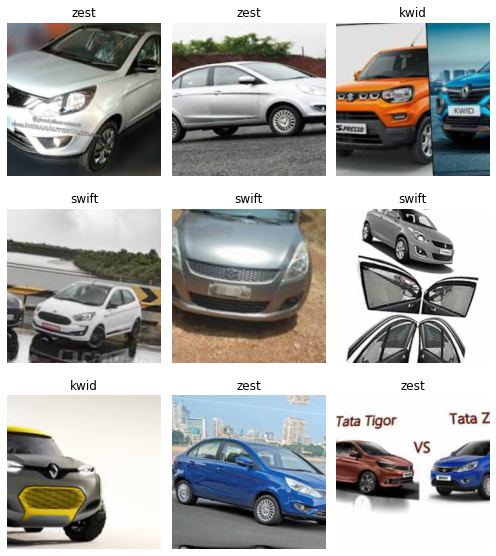

In [25]:
data.show_batch(rows=3, figsize=(7,8))

In [26]:
data.c

3

In [27]:
len(data.train_ds)

480

In [28]:
len(data.valid_ds)

120

## Train Model

In [29]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [30]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.718565,0.814270,0.333333,00:38
1,1.269782,0.852705,0.258333,00:39
2,1.011380,0.840725,0.233333,00:38
3,0.877669,0.788520,0.208333,00:39


In [31]:
learn.save('stage-1')

In [32]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


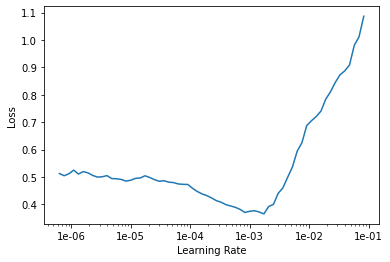

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(20, max_lr=slice(1e-04,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.609967,0.689262,0.225000,00:55
1,0.475252,0.605036,0.191667,00:54
2,0.388225,0.569439,0.183333,00:54
3,0.315428,0.292313,0.075000,00:54
4,0.263231,0.270688,0.075000,00:53
5,0.219823,0.518946,0.150000,00:53
6,0.205816,0.769962,0.166667,00:52
7,0.201212,0.835779,0.183333,00:53
8,0.186172,0.607112,0.108333,00:53
9,0.166650,0.515018,0.116667,00:52


In [36]:
learn.save('stage-2')

In [37]:
learn.load('stage-2');

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

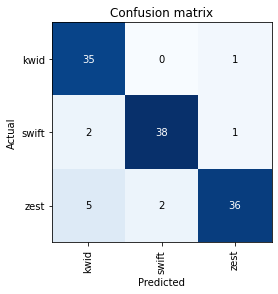

In [40]:
interp.plot_confusion_matrix()

In [41]:
from fastai.widgets import *

In [42]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [44]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [45]:
ds, idxs = DatasetFormatter.from_toplosses(learn_cln)

In [46]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [47]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [48]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [49]:
learn.export()

In [50]:
defaults.device = torch.device('cpu')

In [53]:
img = open_image(path/'kwid'/'00000022.jpg')

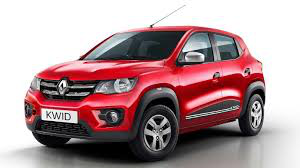

In [54]:
img

In [55]:
learn = load_learner(path)

In [56]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'kwid'

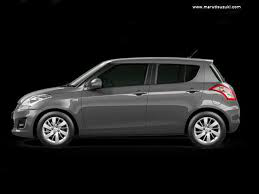

In [57]:
sw = open_image(path/'swift'/'00000018.jpg')
sw

In [58]:
pred_class,pred_idx,outputs = learn.predict(sw)
pred_class.obj

'swift'